#### Main code to analyse the .csv files from Simion

##### Libraries

In [1]:
#%pip install uncertainties
import matplotlib
import pandas as pd
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap
import math
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from uncertainties import ufloat as uf
import uncertainties.unumpy as unp

#### Split big .csv into smaller ones (Optional)

In [49]:
T1_min = 23
T1_max = 27
T2_min = 25
T2_max = 29
T1_step = 0.1
T2_step = 0.1
T_stab = 200

chunksize_split = int((T1_max - T1_min)/T1_step) * int((T2_max - T2_min)/T2_step) * 201
#chunksize_split = 1 * int((T2_max - T2_min)/T2_step) * 201


#data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v2/data/Big Emittance_new/data_Time(17_22_19_23_' + str(V_endcap) + '_200)_4_v2.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'


def write_chunk(part, lines):
    with open('C:/Users/r0867867/Documents/IonTrap_v3/data/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(part) + '_' + str(T_stab) + ')_4_v2_optimal_spread.csv', 'w') as f_out:
        f_out.write(header)
        f_out.writelines(lines)
with open("C:/Users/r0867867/Documents/IonTrap_v3/data/data_Time(23_27_25_29_40_200)_4_v2_optimal_spread.txt", "r") as f:
    count = 0
    header = f.readline()
    lines = []
    for line in f:
        count += 1
        lines.append(line)
        if count % chunksize_split == 0:
            write_chunk(count // chunksize_split, lines)
            lines = []
    # write remainder
    if len(lines) > 0:
        write_chunk((count // chunksize_split) + 1, lines)

##### True for VvsZ and False for T$_1$ vs T$_2$

In [2]:
chunksize = 201

answer = False

##### T$_1$ vs T$_2$ part

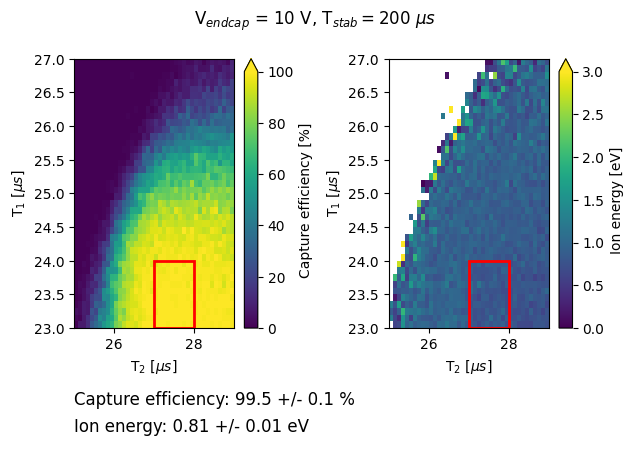

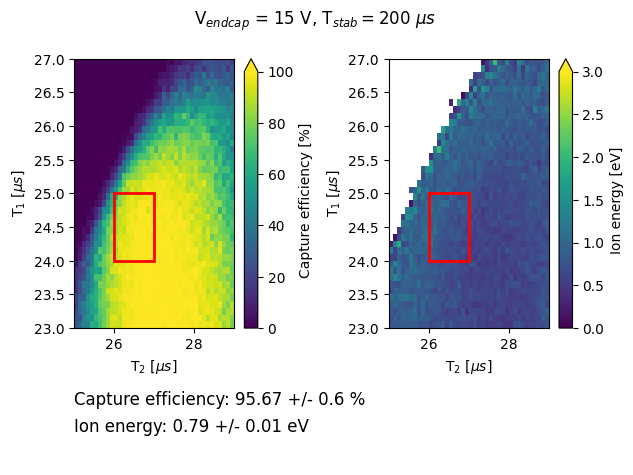

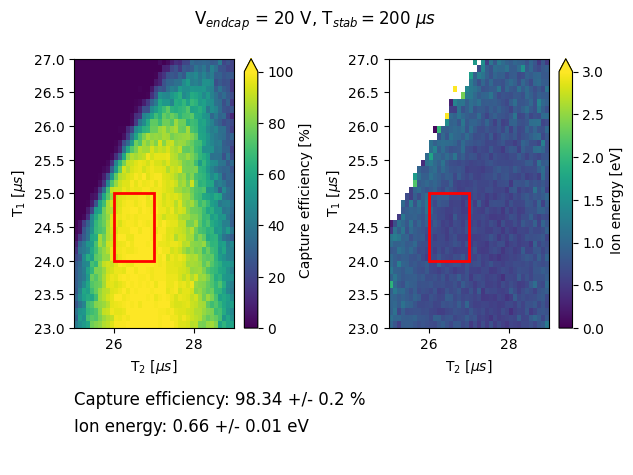

File for V$_{endcap}$ = 25 V does not exist.


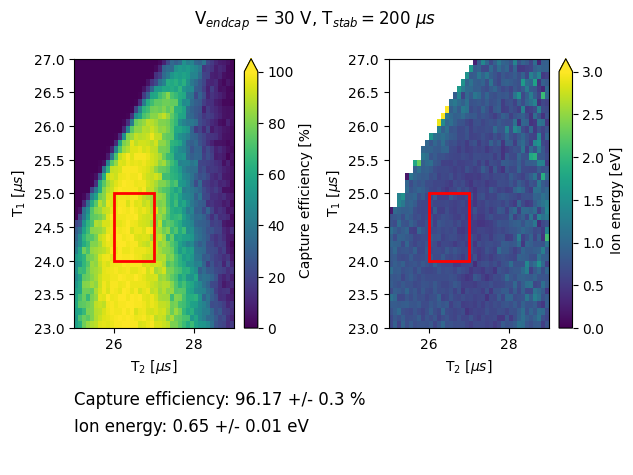

File for V$_{endcap}$ = 35 V does not exist.


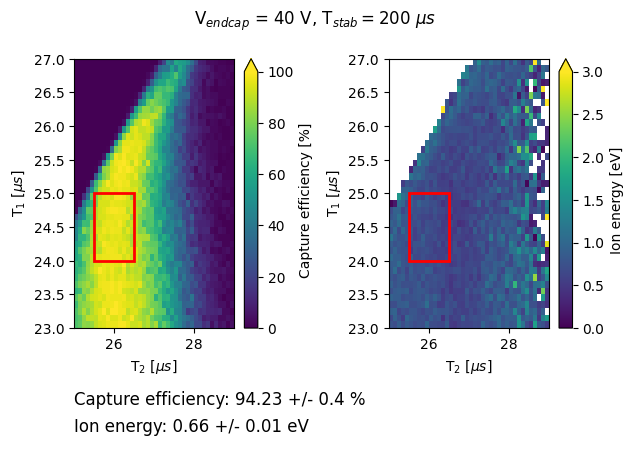

File for V$_{endcap}$ = 45 V does not exist.


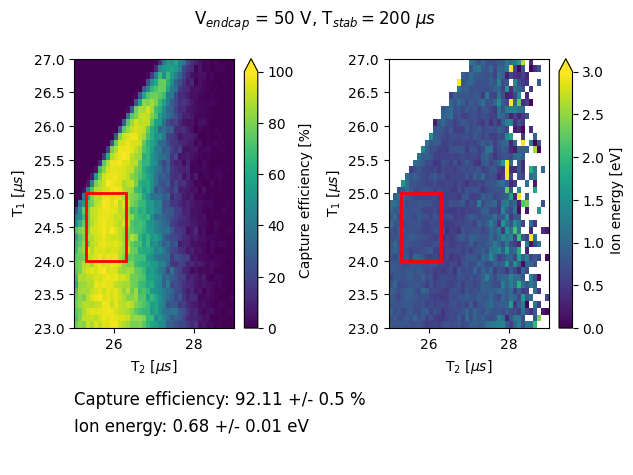

File for V$_{endcap}$ = 55 V does not exist.


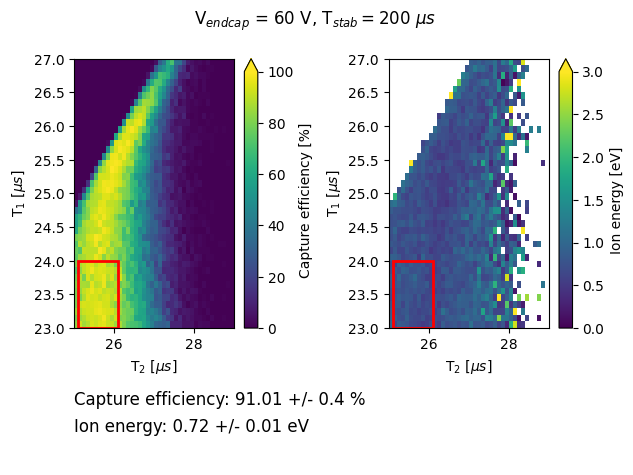

File for V$_{endcap}$ = 65 V does not exist.


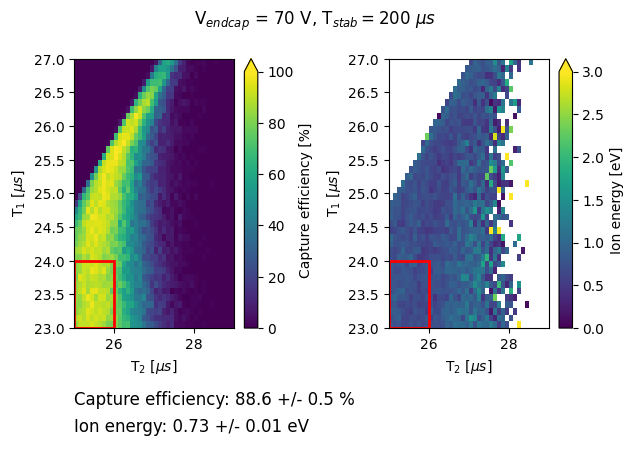

In [9]:
if answer == False:
    
    T1_min = 23
    T1_max = 27
    T2_min = 25
    T2_max = 29

    T1_step = 0.1
    T2_step = 0.1

    T_stab = 200

    matrix_stab = ( int((T1_max - T1_min)/T1_step), int((T2_max - T2_min)/T2_step)) # add +1 for 0.05 step
    matrix_stab = np.zeros(matrix_stab)
    
    matrix_ke = ( int((T1_max - T1_min)/T1_step), int((T2_max - T2_min)/T2_step)) # add +1 for 0.05 step
    matrix_ke = np.zeros(matrix_ke)

    KE_50_1 = [];
    KE_50_2 = [];
    KE_80_1 = [];
    KE_80_2 = [];
    KE_specific_1 = [];
    KE_specific_2 = [];

    Stab_Criterion_50 = [];
    Stab_Criterion_80 = [];
    Stab_Rate_value = [];
    Stab_Rate_error = [];
    sr_value = [];
    sr_error = [];

    #T1_low_gate = 24
    #T1_high_gate = 25
    #T2_low_gate = 26
    #T2_high_gate = 27

    T1_low_gate = [23,24,24,24,24,24,23,23]
    T1_high_gate = [24,25,25,25,25,25,24,24]
    T2_low_gate = [27,26,26,26,25.5,25.3,25.1,25]
    T2_high_gate = [28,27,27,27,26.5,26.3,26.1,26]

    x_KE = [];

    Counter_gate = -1

    for V_endcap in range(10,75,5):
        try:
            
            data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v3/data/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(V_endcap) + '_' + str(T_stab) + ')_4_v2.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'
            #data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v3/data/data_Time(23_27_25_29_40_200)_4_v2.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'
            Counter_gate = Counter_gate + 1
            x_KE.append(V_endcap)
            i = 0
            j = 0
            
            KE = [];
            d = [];
            d_specific = [];
            sr = [];
            d_50 = [];
            d_80 = [];
            d_50_mean = [];
            d_80_mean = [];
            d_50_error = [];
            d_80_error = [];

            Stab_number_50 = [];
            Stab_number_80 = [];
            
            Total_bins = int((T1_max - T1_min)/T1_step) * int((T2_max - T2_min)/T2_step)

            Counter = 0

            for chunk in data:
                Counter = Counter + 1

                KE_chunk = [];
                chunk['ToF'].astype(float)
                chunk['KE'].astype(float)

                part = chunk.IonNumber.str.count('UNSTABLE').sum()
                KE_chunk = chunk.loc[chunk['ToF'] >= (int(T_stab) - 5), 'KE']

                matrix_stab[i,j] = ((chunksize - 1)/2 - part)/((chunksize - 1)/2)*100

                if (matrix_stab[i,j] >= 0.5):
                    Stab_number_50.append(matrix_stab[i,j])

                if (matrix_stab[i,j] >= 0.8):
                    Stab_number_80.append(matrix_stab[i,j]) 

                if (((chunksize - 1)/2 - part) != 0): # KE of chunk with higher than 0 Stability
                    matrix_ke[i,j] = sum(KE_chunk)/((chunksize - 1)/2 - part)
                    d.append(matrix_ke[i,j])

                    if ((j >= (T2_low_gate[Counter_gate] - T2_min)/T2_step) and (j < (T2_high_gate[Counter_gate] - T2_min)/T2_step) and (i >= (T1_low_gate[Counter_gate] - T1_min)/T1_step) and (i < (T1_high_gate[Counter_gate] - T1_min)/T1_step) ):
                        d_specific.append(matrix_ke[i,j])
                        sr.append(matrix_stab[i,j])
                else:
                    matrix_ke[i,j] = np.nan


                if (((chunksize - 1)/2 - part) >= 80): # KE of chunk with higher than 80% Stability
                    d_80.append(sum(KE_chunk)/((chunksize - 1)/2 - part))

                if (((chunksize - 1)/2 - part) >= 50): # KE of chunk with higher than 50% Stability
                    d_50.append(sum(KE_chunk)/((chunksize - 1)/2 - part))


                j += 1
                if (j%((T2_max - T2_min)/T2_step) == 0): # add +1 for 0.05 step
                    j = 0
                    i += 1

                


            x = np.arange(T2_min, T2_max, T2_step)  # add Ti_step
            y = np.arange(T1_min, T1_max, T1_step)

            Stab_Criterion_50.append(len(Stab_number_50)/Total_bins) 
            Stab_Criterion_80.append(len(Stab_number_80)/Total_bins) 

            ## My new addition:
            Stab_Rate_value.append(sum(map(sum, matrix_stab))/Total_bins)
            Stab_Rate_error.append(np.std(matrix_stab)/Total_bins)
            sr_value.append(sum(sr)/len(sr)) 
            sr_error.append(np.std(sr)/np.sqrt(len(sr)))

            ## End of my new addition

            if (len(d_50) > 0):
                d_50_mean = sum(d_50)/len(d_50)
                d_50_error = np.std(d_50)/np.sqrt(len(d_50))
            else:
                d_50_mean = 0
                d_50_error = 0

            if (len(d_80) > 0):
                d_80_mean = sum(d_80)/len(d_80)
                d_80_error = np.std(d_80)/np.sqrt(len(d_80))
            else:
                d_80_mean = 0
                d_80_error = 0

            if (len(d_specific) > 0):
                d_specific_mean = sum(d_specific)/len(d_specific)
                d_specific_error = np.std(d_specific)/np.sqrt(len(d_specific))
            else:
                d_specific_mean = 0
                d_specific_error = 0
                

            KE_50_1.append(d_50_mean)
            KE_50_2.append(d_50_error)
            KE_80_1.append(d_80_mean)
            KE_80_2.append(d_80_error)
            KE_specific_1.append(d_specific_mean)
            KE_specific_2.append(d_specific_error)

            fig = plt.figure()
            fig.suptitle('V$_{endcap}$ = ' + str(V_endcap) + ' V, T$_{stab} = $' + str(T_stab) + ' $\mu s$', fontsize = 12)
            gs = gridspec.GridSpec(2,2, height_ratios = [4,1])
            
            ax1=fig.add_subplot(gs[0,0])
            ax2=fig.add_subplot(gs[0,1])
            ax3=fig.add_subplot(gs[1,:])
            
            c = ax1.pcolormesh(x+0.05, y+0.05, matrix_stab, vmin = 0, vmax = 100)
            #rect = patches.Rectangle((float(x[0])+1, float(y[0])+1), 10, 10)
            #c = ax1.pcolormesh(x+0.05, y+0.05, rect)
            ax1.add_patch( Rectangle((T2_low_gate[Counter_gate],T1_low_gate[Counter_gate]),1,1, fc = 'none', ec = 'r', lw = 2))
            ax1.set_xlabel('T$_2$ [$\mu s$]')
            ax1.set_ylabel('T$_1$ [$\mu s$]')
            ax1.set_xlim(T2_min, T2_max)
            ax1.set_ylim(T1_min, T1_max)
            #ax1.set_aspect('equal')
            fig.colorbar(c, ax = ax1, extend = 'max', label = 'Capture efficiency [%]')
            #ax1.set_title('V$_{endcap}$ = ' + str(V_endcap) + ' V, T$_{stab} = $' + str(T_stab) + ' $\mu s$', loc = 'center')

            #rect = patches.Rectangle((x[0]+1, y[0]+1), 10, 10, linewidth=1, edgecolor='r', facecolor='r')
            #c = ax1.pcolormesh(x+0.05, y+0.05, rect, cmap=ListedColormap([[1, 1, 1, 0], [0, 0, 0, 1]]))
            #fig.colorbar(c, ax = ax1, extend = 'max')
            
            c = ax2.pcolormesh(x+0.05, y+0.05, matrix_ke, vmin = 0, vmax = 3) #vmin,vmax
            ax2.add_patch( Rectangle((T2_low_gate[Counter_gate],T1_low_gate[Counter_gate]),1,1, fc = 'none', ec = 'r', lw = 2))
            ax2.set_xlabel('T$_2$ [$\mu s$]')
            ax2.set_ylabel('T$_1$ [$\mu s$]')
            ax2.set_xlim(T2_min, T2_max)
            ax2.set_ylim(T1_min, T1_max)
            #ax2.set_aspect('equal')
            fig.colorbar(c, ax = ax2, extend = 'max', label = 'Ion energy [eV]')
            
            ax3.text(0, 0.9, 'Capture efficiency: ' + str(round(sum(sr)/len(sr),3)) + ' +/- ' + str(round(np.std(sr)/np.sqrt(len(sr)),1)) + ' %', fontsize = 12)
            ax3.text(0, 0.5, 'Ion energy: ' + str(round(d_specific_mean,2)) + ' +/- ' + str(round(d_specific_error,2)) + ' eV', fontsize = 12) #, bbox=dict(facecolor='red', alpha=0.5)
            ax3.axis('off')

            #n, bins, patches = ax3.hist(x=d_specific, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.8)
            #ax3.set_xlim(0,4)
            #ax3.set_xlabel('<KE> [eV]')
            #ax3.set_ylabel('Counts')
            #ax3.set_title('Mean = ' + str(round(sum(d)/len(d),2)) + ' eV')

            
            plt.tight_layout()
            plt.savefig('C:/Users/r0867867/Documents/IonTrap_v3/Figures/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(V_endcap) + '_' + str(T_stab) + ')_4_v2.png', dpi = 150)
            plt.show()

        except:
            print('File for V$_{endcap}$ = ' + str(V_endcap) + ' V does not exist.')


#### Let's repeat it using the new KE and their errors





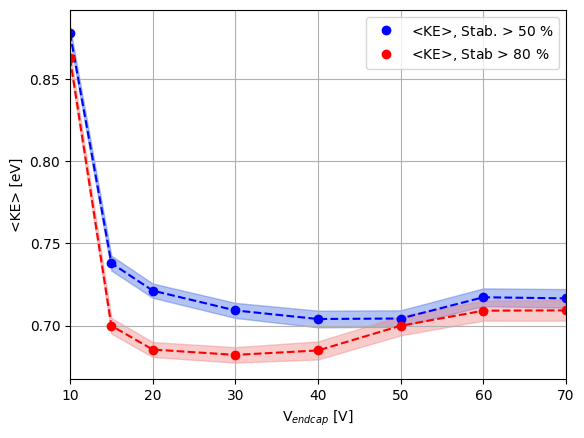

In [10]:
KE_50 = unp.uarray(KE_50_1, KE_50_2)
KE_80 = unp.uarray(KE_80_1, KE_80_2)
KE_specific = unp.uarray(KE_specific_1, KE_specific_2)  ## The one for the time gate


plt.errorbar(x_KE, unp.nominal_values(KE_50), color = 'blue', label = '<KE>, Stab. > 50 $\%$', fmt = 'o')
plt.errorbar(x_KE, unp.nominal_values(KE_80)    , color = 'red', label = '<KE>, Stab > 80 $\%$', fmt = 'o')
plt.plot(x_KE, unp.nominal_values(KE_50), color = 'blue', linestyle = '--')
plt.plot(x_KE, unp.nominal_values(KE_80), color = 'red', linestyle = '--')

plt.fill_between(x_KE, unp.nominal_values(KE_50) + unp.std_devs(KE_50), unp.nominal_values(KE_50) - unp.std_devs(KE_50), color = 'royalblue', alpha = 0.4)
plt.fill_between(x_KE, unp.nominal_values(KE_80) + unp.std_devs(KE_80), unp.nominal_values(KE_80) - unp.std_devs(KE_80), color = 'lightcoral', alpha = 0.4)

plt.xlabel('V$_{endcap}$ [V]')
plt.ylabel('<KE> [eV]')
plt.legend()
plt.grid()
#plt.ylim(0.7, 1.5)
plt.xlim(10,70)
plt.show()

#### KE percent loss

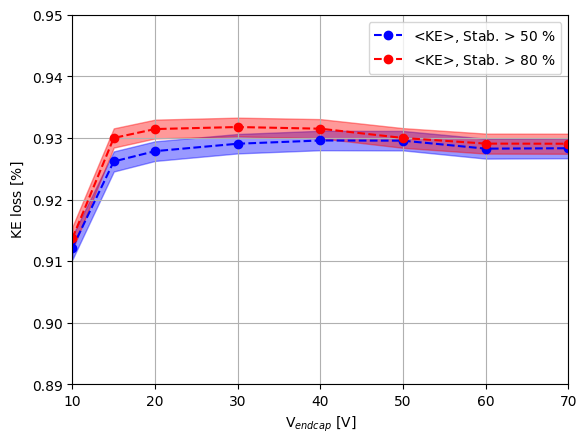

In [44]:
E_beam = uf(10,0.2123) ## within 1 sigma
KE_loss_50 = (E_beam - KE_50)/E_beam
KE_loss_80 = (E_beam - KE_80)/E_beam

plt.plot(x_KE, unp.nominal_values(KE_loss_50), marker = 'o', color = 'blue', linestyle = '--', label = '<KE>, Stab. > 50 $\%$')
plt.plot(x_KE, unp.nominal_values(KE_loss_80), marker = 'o', color = 'red', linestyle = '--', label = '<KE>, Stab. > 80 $\%$')

plt.fill_between(x_KE, unp.nominal_values(KE_loss_50) - unp.std_devs(KE_loss_50), unp.nominal_values(KE_loss_50) + unp.std_devs(KE_loss_50), color = 'blue', alpha = 0.4)
plt.fill_between(x_KE, unp.nominal_values(KE_loss_80) - unp.std_devs(KE_loss_80), unp.nominal_values(KE_loss_80) + unp.std_devs(KE_loss_80), color = 'red', alpha = 0.4)

plt.xlabel('V$_{endcap}$ [V]')
plt.ylabel('KE loss [$\%$]')
plt.ylim(0.89,0.95)
plt.xlim(10,70)
plt.legend()
plt.grid()
plt.show()

#### Stability Criterion

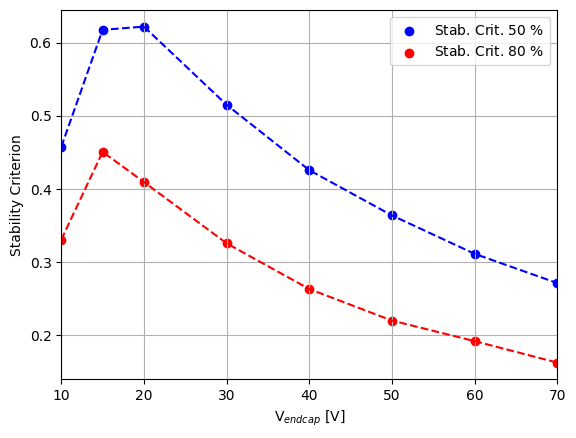

In [45]:
plt.scatter(x_KE, Stab_Criterion_50, color = 'blue', marker = 'o', label = 'Stab. Crit. 50 $\%$')
plt.scatter(x_KE, Stab_Criterion_80, color = 'red', marker = 'o', label = 'Stab. Crit. 80 $\%$')
plt.plot(x_KE, Stab_Criterion_50, color = 'blue', linestyle = '--')
plt.plot(x_KE, Stab_Criterion_80, color = 'red', linestyle = '--')

plt.legend()
plt.grid()
plt.xlabel('V$_{endcap}$ [V]')
plt.ylabel('Stability Criterion')
plt.xlim(10,70)
plt.show()

#### Stability Rate

[99.5+/-0.0818535277187245 95.67+/-0.5996757457159662
 98.34+/-0.17900837969212505 96.17+/-0.3406038754917507
 94.23+/-0.39644797893292383 92.11+/-0.47368660525710454
 91.01+/-0.43623273604808704 88.6+/-0.4662617290749907]


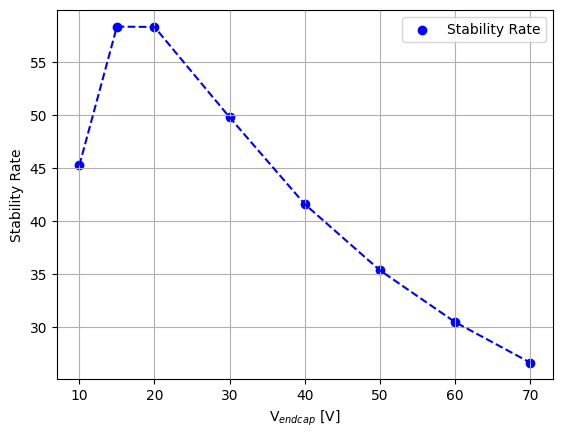

In [11]:
sr_array = unp.uarray(sr_value, sr_error)
print(sr_array)

plt.scatter(x_KE, Stab_Rate_value, color = 'blue', marker = 'o', label = 'Stability Rate')
plt.plot(x_KE, Stab_Rate_value, color = 'blue', linestyle = '--')
#plt.xlim(1,10)
plt.legend()
plt.grid()
plt.xlabel('V$_{endcap}$ [V]')
plt.ylabel('Stability Rate')
plt.show()

#### All together

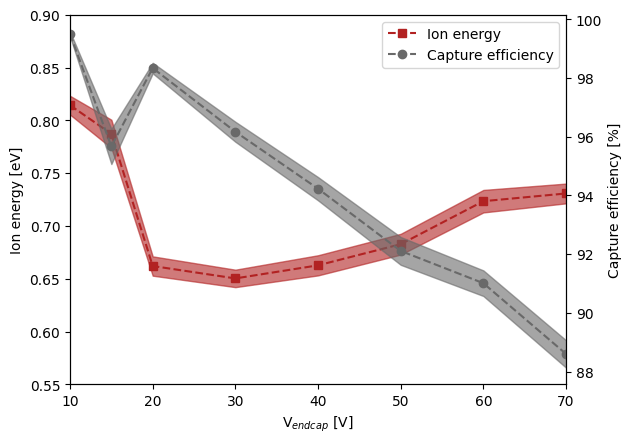

In [20]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x_KE, unp.nominal_values(KE_specific), marker = 's', color = 'firebrick', linestyle = '--', label = 'Ion energy')
ax1.fill_between(x_KE, unp.nominal_values(KE_specific) - unp.std_devs(KE_specific), unp.nominal_values(KE_specific) + unp.std_devs(KE_specific), color = 'firebrick', alpha = 0.6)

ax2.plot(x_KE, unp.nominal_values(sr_array), marker = 'o', color = 'dimgray', linestyle = '--', label = 'Capture efficiency')
ax2.fill_between(x_KE, unp.nominal_values(sr_array) - unp.std_devs(sr_array), unp.nominal_values(sr_array) + unp.std_devs(sr_array), color = 'dimgray', alpha = 0.6)


ax1.set_xlabel('V$_{endcap}$ [V]')
ax1.set_ylabel('Ion energy [eV]')
ax2.set_ylabel('Capture efficiency [%]')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = 1)

ax1.set_ylim(0.55, 0.9)
#ax2.set_ylim(0,0.13)
ax1.set_xlim(10,70)
plt.savefig('C:/Users/r0867867/Documents/IonTrap_v3/Figures/Optimal_Sim_Params_hybrid.png', dpi = 150)

plt.show()
